# Load Libraries and Images

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [ ]:
# Load images
image5 = cv2.imread('/Images/image8.jpg', 0)
image6 = cv2.imread('/Images/image9.jpg', 0)

# A. Frequency Spectrum with FFT

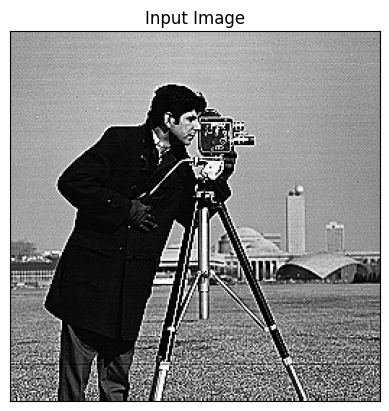

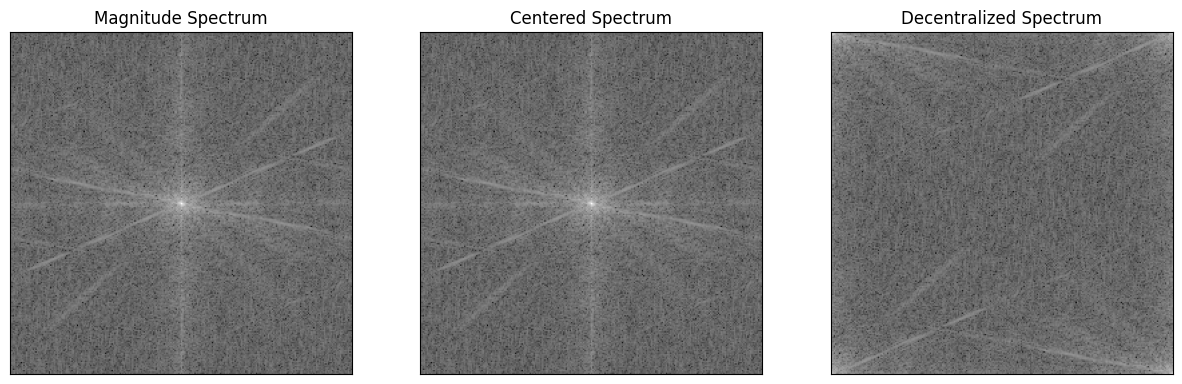

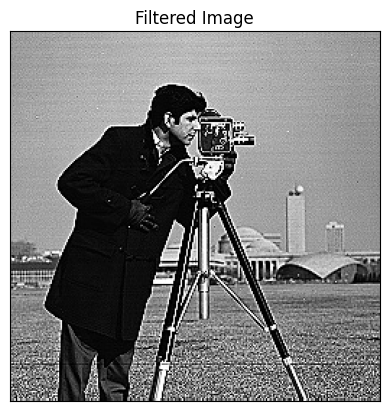

In [ ]:
plt.imshow(image5, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.show()

# Apply Fast Fourier Transform to the image
f = np.fft.fft2(image5)

# Shift the zero-frequency component to the center of the spectrum
fshift = np.fft.fftshift(f)

# Visualize the frequency spectrum
magnitude_spectrum = 20 * np.log(np.abs(fshift))
magnitude_spectrum_decentralized = 20 * np.log(np.abs(f))
magnitude_spectrum_centered = 20 * np.log(np.abs(np.fft.fftshift(f, axes=(0, 1))))

plt.figure(figsize=(15,10))
plt.subplot(131), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(magnitude_spectrum_centered, cmap='gray')
plt.title('Centered Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(magnitude_spectrum_decentralized, cmap='gray')
plt.title('Decentralized Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

# Apply inverse FFT to get back the filtered image
fshift[np.abs(fshift) < 20] = 0 # apply a threshold to remove high-frequency components
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.real(img_back)

# Display the filtered image
plt.imshow(img_back, cmap='gray')
plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])
plt.show()


# B. Ideal Low Pass Filter (ILPF) and Ideal High Pass Filter (IHPF)

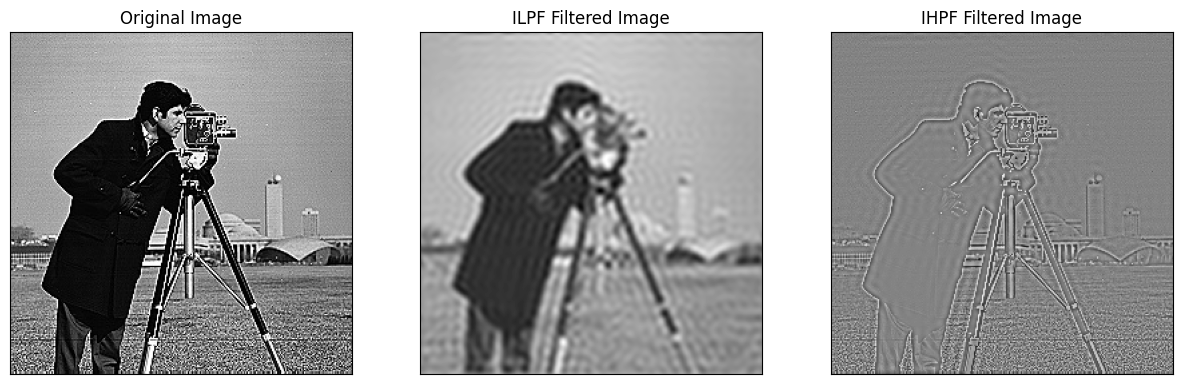

In [ ]:
# Get the dimensions of the image
rows, cols = image5.shape
crow, ccol = rows//2, cols//2

# Create ILPF
ILPF = np.zeros((rows, cols), np.uint8)
ILPF[crow-30:crow+30, ccol-30:ccol+30] = 1

# Create IHPF
IHPF = np.ones((rows, cols), np.uint8)
IHPF[crow-30:crow+30, ccol-30:ccol+30] = 0

# Apply the filters to the Fourier transformed image
ILPF_filtered = np.fft.ifft2(np.fft.ifftshift(fshift*ILPF))
IHPF_filtered = np.fft.ifft2(np.fft.ifftshift(fshift*IHPF))

# Take the real part of the filtered images
ILPF_filtered = np.real(ILPF_filtered)
IHPF_filtered = np.real(IHPF_filtered)

# Show the original and filtered images
plt.figure(figsize=(15,10))
plt.subplot(131), plt.imshow(image5, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(ILPF_filtered, cmap='gray')
plt.title('ILPF Filtered Image'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(IHPF_filtered, cmap='gray')
plt.title('IHPF Filtered Image'), plt.xticks([]), plt.yticks([])
plt.show()

# C. Gaussian Smoothing

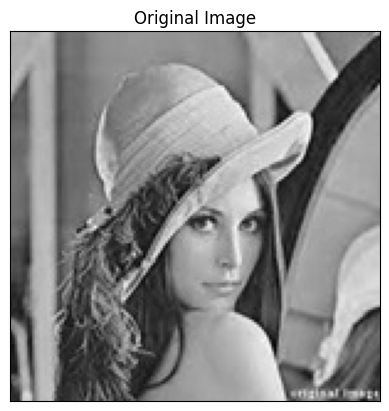

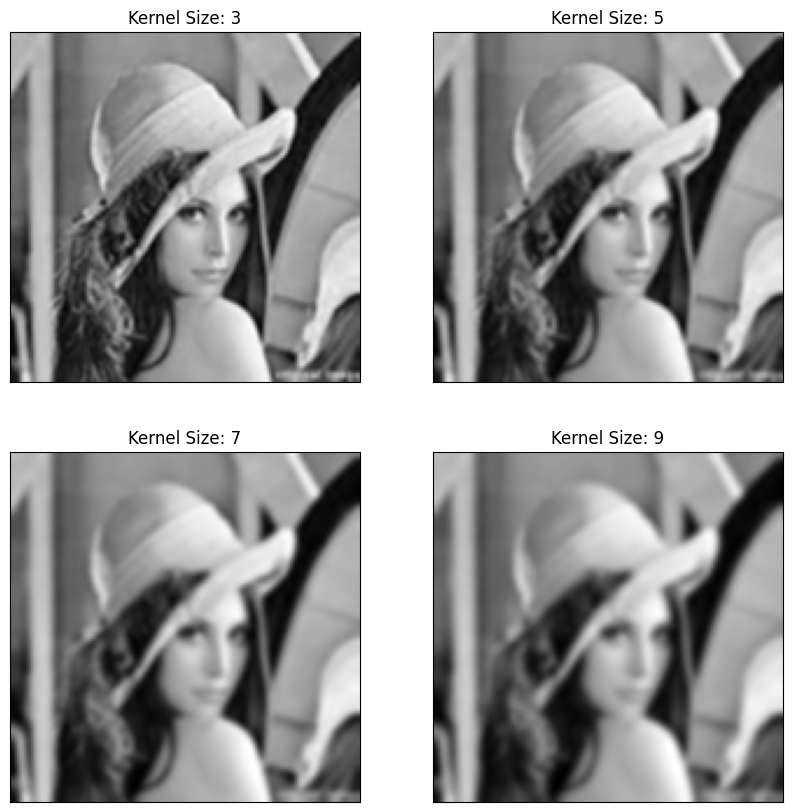

In [ ]:
kernel_sizes = [3, 5, 7, 9]

plt.imshow(image6, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(10,10))
for i, ksize in enumerate(kernel_sizes):
    # Apply the filter
    filtered = cv2.GaussianBlur(image6, (ksize, ksize), 0)

    # Show the filtered image
    plt.subplot(2, 2, i+1)
    plt.imshow(filtered, cmap='gray')
    plt.title('Kernel Size: {}'.format(ksize))
    plt.xticks([]), plt.yticks([])

plt.show()